# データの準備

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
import japanize_matplotlib


In [16]:
df = pd.read_csv('california_housing_cleansing.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [17]:
# 説明変数の定義
X = df.drop(columns=['住宅価格']).to_numpy()
# 目的変数の定義
y = df['住宅価格'].to_numpy()

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 回帰手法の改善

In [18]:
# StandardScalerのインポート
from sklearn.preprocessing import StandardScaler


In [19]:
scaler = StandardScaler()

In [20]:
# 標準化の変換モデルの生成
scaler.fit(X_train)

StandardScaler()

In [21]:
#  標準化の変換モデルを利用したスケールの変換
X_train_scaled = scaler.transform(X_train)

In [22]:
# 変換前
df_X_train = pd.DataFrame(X_train, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train.head()


,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,3.7500,29.0,1390.0,34.04,-117.98,1.056115,0.223022
1,3.1187,25.0,588.0,33.01,-117.07,3.605442,0.647959
2,4.6406,45.0,1180.0,33.90,-118.07,1.505085,0.299153
3,5.9010,18.0,2882.0,34.33,-118.43,2.044067,0.319223
4,2.6167,42.0,1271.0,37.99,-122.34,1.204563,0.256491


In [23]:
# 変換後
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train_scaled.head()


,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,0.034653,0.178247,-0.075532,-0.723337,0.760166,-0.837592,-0.809192
1,-0.368102,-0.170455,-0.767887,-1.203976,1.220266,1.614325,1.182965
2,0.602835,1.573057,-0.256822,-0.788667,0.714662,-0.405778,-0.452281
3,1.406941,-0.780684,1.212489,-0.588012,0.532645,0.112610,-0.358190
4,-0.688367,1.311530,-0.178263,1.119887,-1.444266,-0.694816,-0.652284


In [24]:
# チェック
df_X_train_scaled.describe()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
count,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04
mean,4.533263e-15,7.651999e-17,8.280556e-17,-3.489093e-14,-8.354643e-14,1.134163e-14,-1.848504e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.038837e+00,-2.262670e+00,-1.268592e+00,-1.418630e+00,-2.420081e+00,-1.850904e+00,-1.851601e+00
25%,-7.374752e-01,-8.678601e-01,-5.701945e-01,-7.793341e-01,-1.034727e+00,-4.232155e-01,-3.998158e-01
50%,-1.394514e-01,3.896079e-03,-2.291970e-01,-6.300096e-01,5.225325e-01,-2.454245e-02,-1.384252e-01
75%,5.805695e-01,7.884766e-01,2.622279e-01,9.752284e-01,7.652223e-01,2.989548e-01,1.855580e-01
max,7.211958e+00,2.096111e+00,2.952823e+01,2.935112e+00,2.615732e+00,3.790064e+01,3.916628e+01


In [25]:
X_test_scaled  = scaler.transform(X_test)


In [26]:
# 変換前のX_test
df_X_test = pd.DataFrame(X_test, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,2.9628,36.0,2388.0,34.13,-117.27,1.397404,0.287688
1,2.2279,37.0,72.0,37.65,-120.95,1.888889,0.277778
2,4.5781,9.0,2235.0,33.18,-117.26,2.031320,0.354810
3,5.5209,35.0,1052.0,34.22,-118.52,1.539924,0.258555
4,2.2361,46.0,101.0,38.02,-121.82,1.742574,0.425743


In [27]:
#　変換後のX_test (X_test_scaled)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test_scaled.head()


,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,-0.467563,0.788477,0.786026,-0.681340,1.119145,-0.509344,-0.506026
1,-0.936412,0.875652,-1.213342,0.961229,-0.741477,-0.036639,-0.552489
2,0.562961,-1.565265,0.653943,-1.124647,1.124201,0.100350,-0.191353
3,1.164446,0.701301,-0.367323,-0.639342,0.487140,-0.372270,-0.642607
4,-0.931181,1.660233,-1.188306,1.133886,-1.181352,-0.177363,0.141187


In [28]:
#変換後のX_test (X_test_scaled)の平均値と標準偏差を確認
df_X_test_scaled.describe()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,-0.005149,0.008292,-0.020433,0.004869,-0.002439,0.030341,0.037607
std,1.005489,0.988514,1.012970,1.007327,1.005098,1.245476,1.404714
min,-2.038837,-2.175494,-1.272908,-1.423296,-2.435249,-1.752933,-1.772656
25%,-0.748863,-0.780684,-0.583144,-0.784000,-1.065063,-0.407443,-0.380380
50%,-0.154763,0.003896,-0.253369,-0.630010,0.517476,-0.011944,-0.123381
75%,0.592882,0.788477,0.258559,0.965896,0.765222,0.303824,0.197324
max,7.211958,2.096111,23.385096,2.967777,2.534835,51.258832,64.690468


## スケール変換後の回帰の流れ


1. 予測モデルの学習
1. 予測モデルの評価
1. 予測
1. 設定したゴールに対する考察

In [30]:
# 予測モデルの学習
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# 予測モデルの評価
model.score(X_train_scaled, y_train)

0.5967954005117011

In [33]:
model.score(X_test_scaled, y_test)

0.5752388860477974

In [34]:
#　予測
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])


In [35]:
#　スケール変換
X_new_scaled = scaler.transform(X_new)
X_new_scaled

array([[ 2.74605512,  1.22435471, -0.84385579,  0.65791393, -0.26115327,
        -0.8915631 , -0.91712007],
       [-1.08180733, -1.4780894 ,  0.45107143,  1.1245529 , -1.27236074,
        -0.41066806,  0.48931492],
       [-1.71978441, -0.17045515, -0.41221338,  1.1245529 , -0.76675701,
         0.07022698,  2.83337325]])

In [36]:
model.predict(X_new_scaled)

array([3.2387497 , 1.42228534, 1.43428255])

In [37]:
#　設定したゴールに対する考察
print(model.coef_)
print(model.intercept_)

[ 0.63969525  0.07941585  0.01976508 -0.86589837 -0.81166365 -0.21676945
  0.36174341]
1.8977734592306714


<Axes: >

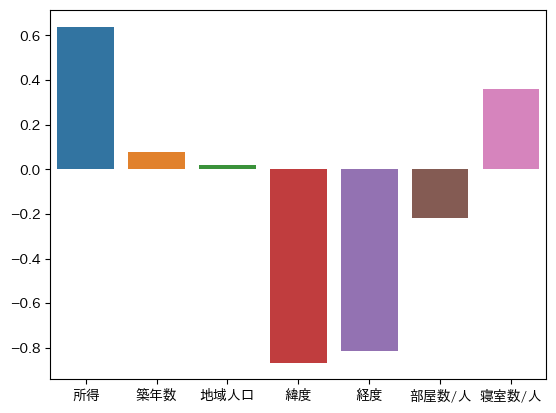

In [38]:
sns.barplot(x=['所得', '築年数', '地域人口', '緯度', 
               '経度', '部屋数/人', '寝室数/人'], 
               y=model.coef_)

## 回帰手法の改善（多重共線性の対処）

In [39]:
#説明変数同士の相関係数を確認する。住宅価格の情報は除いて表示
df.drop(columns=['住宅価格']).corr()

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
所得,1.000000,-0.202770,0.040534,-0.075305,-0.016145,0.210331,-0.060904
築年数,-0.202770,1.000000,-0.280775,-0.051961,-0.033877,-0.157083,-0.097772
地域人口,0.040534,-0.280775,1.000000,-0.106927,0.090809,-0.136746,-0.132073
緯度,-0.075305,-0.051961,-0.106927,1.000000,-0.922726,0.156807,0.111326
経度,-0.016145,-0.033877,0.090809,-0.922726,1.000000,-0.077510,-0.041287
部屋数/人,0.210331,-0.157083,-0.136746,0.156807,-0.077510,1.000000,0.913547
寝室数/人,-0.060904,-0.097772,-0.132073,0.111326,-0.041287,0.913547,1.000000


<Axes: xlabel='経度', ylabel='緯度'>

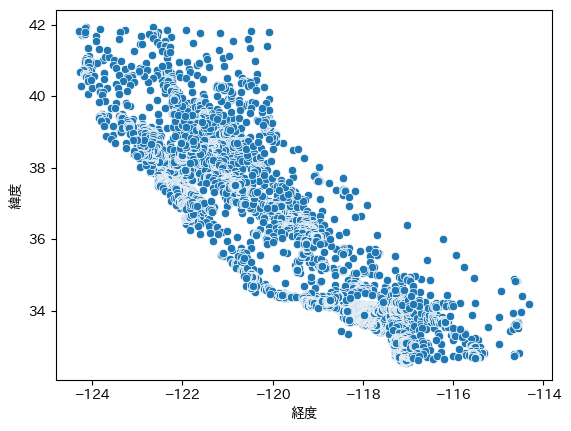

In [40]:
#緯度と経度のペアを散布図で比較
sns.scatterplot(x='経度', y='緯度', data=df)

<Axes: xlabel='部屋数/人', ylabel='寝室数/人'>

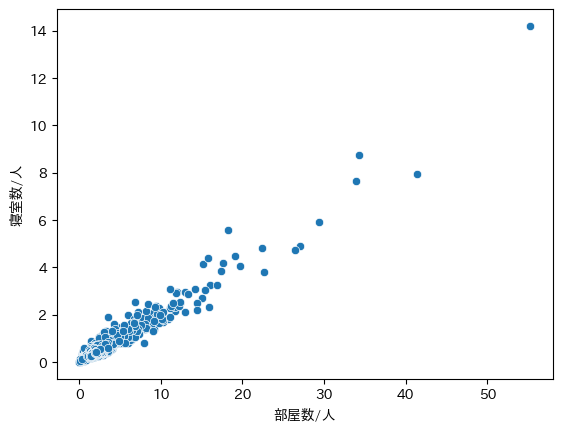

In [41]:
# 部屋数/人と寝室数/人のペアの対処方法を検討
sns.scatterplot(x='部屋数/人', y='寝室数/人', data=df)


In [42]:
# 説明変数と目的変数を再定義
X = df[['所得', '築年数', '地域人口', '緯度', '部屋数/人']].to_numpy()
y = df['住宅価格'].to_numpy()


## 多重共線性の対処後の流れ

1. 説明変数のスケール変換
1. 予測モデルの学習
1. 予測モデルの評価
1. 予測
1. 設定したゴールに対する考察

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [44]:
scaler = StandardScaler()


In [45]:
scaler.fit(X_train)


StandardScaler()

In [46]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [47]:
# 予測モデルの学習
model = LinearRegression()


In [48]:
model.fit(X_train_scaled, y_train)


LinearRegression()

In [49]:
# 予測モデルの評価
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))


0.4740232339239423
0.4835885444947773


In [50]:
# 予測
X_new = np.array([[8, 41, 500, 38, 2],
                  [10, 10, 1000, 40, 1],
                  [7.5, 25, 3500, 39, 3]])


In [51]:
X_new_scaled = scaler.transform(X_new)


In [52]:
model.predict(X_new_scaled)


array([3.68520926, 3.9076587 , 3.36531902])

In [53]:
# 設定したゴールに対する考察
print(model.coef_)
print(model.intercept_)

[ 0.63613076  0.15847579  0.03447017 -0.11502971  0.07119682]
1.8977734592307616


<Axes: >

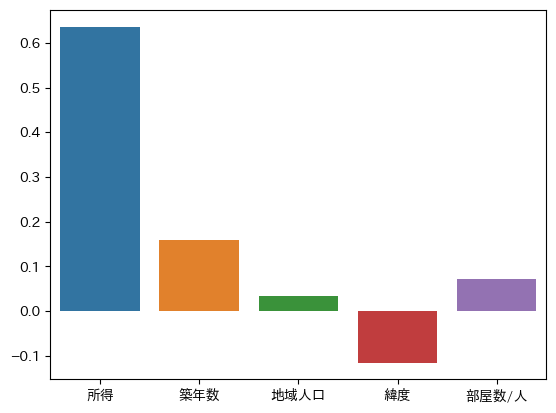

In [54]:
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '部屋数/人'], y=model.coef_)
